In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle

In [4]:
df = pd.read_csv("./data/dataframe.csv", index_col="Unnamed: 0")
df

,Location,Property subtype,Price,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Garden,Surface area land,Pool,Condition
0,Verviers,HOUSE,296607.0,3.0,130.0,False,False,False,True,True,239.0,False,True
2,Aalst,HOUSE,299000.0,5.0,200.0,True,False,False,False,False,1150.0,False,True
3,Charleroi,HOUSE,300000.0,0.0,270.0,False,False,False,True,True,498.0,False,False
4,Nivelles,HOUSE,195000.0,3.0,135.0,True,False,False,True,False,165.0,False,False
6,Oudenaarde,HOUSE,415000.0,3.0,207.0,True,False,False,True,True,534.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10068,Marche-en-Famenne,HOUSE,390000.0,7.0,326.0,True,False,True,True,True,0.0,False,True
10069,Halle-Vilvoorde,HOUSE,488000.0,3.0,150.0,True,False,False,True,True,390.0,False,True
10070,Aalst,VILLA,550000.0,4.0,1380.0,True,False,True,True,True,1300.0,False,True
10071,Charleroi,HOUSE,115000.0,2.0,120.0,False,False,False,False,True,310.0,False,True


In [5]:
locations = {}

In [7]:
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="geoapiExercises") 

places = df[df.Location.isin(locations.keys()) == False].Location.drop_duplicates()
remaining = len(places)
#.apply(to_city)
for place in places:
    locations[place] = (geolocator.geocode(f"{place}, Belgium"))
    print(locations[place])
    print(remaining)
    remaining -= 1
    time.sleep(1.5)

# België / Belgique / Belgien
# Liège | Hainaut | Brabant wallon | Oost-Vlaanderen | Antwerpen | Brussel-Hoofdstad - Bruxelles-Capitale | West-Vlaanderen | Limburg | Luxembourg

Essen, Antwerpen, Vlaanderen, 2910, België / Belgique / Belgien
147
Deurne, Antwerpen, Vlaanderen, 2100, België / Belgique / Belgien
146
Tielt, West-Vlaanderen, Vlaanderen, België / Belgique / Belgien
145
Liège, Wallonie, 4000, België / Belgique / Belgien
144
Tongeren, Limburg, Vlaanderen, 3700, België / Belgique / Belgien
143
Diksmuide, West-Vlaanderen, Vlaanderen, 8600, België / Belgique / Belgien
142
Hasselt, Limburg, Vlaanderen, 3500, België / Belgique / Belgien
141
Merksem, Antwerpen, Vlaanderen, 2170, België / Belgique / Belgien
140
Antwerpen, Vlaanderen, 2000, België / Belgique / Belgien
139
Woluwe-Saint-Lambert - Sint-Lambrechts-Woluwe, Brussel-Hoofdstad - Bruxelles-Capitale, Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest, 1200, België / Belgique / Belgien
138
Gent, Oost-Vlaanderen, Vlaanderen, 24-32, België / Belgique / Belgien
137
Schaerbeek - Schaarbeek, Brussel-Hoofdstad - Bruxelles-Capitale, Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest, 1030

Ans, Liège, Wallonie, 4430, België / Belgique / Belgien
46
Wommelgem, Antwerpen, Vlaanderen, 2160, België / Belgique / Belgien
45
Boechout, Antwerpen, Vlaanderen, 2530, België / Belgique / Belgien
44
Ekeren, Antwerpen, Vlaanderen, 2180, België / Belgique / Belgien
43
Grivegnée, Liège, Wallonie, 4000, België / Belgique / Belgien
42
Profondeville, Namur, Wallonie, 5160, België / Belgique / Belgien
41
Assesse, Namur, Wallonie, 5330, België / Belgique / Belgien
40
Aartselaar, Antwerpen, Vlaanderen, 2630, België / Belgique / Belgien
39
Woluwe-Saint-Pierre - Sint-Pieters-Woluwe, Brussel-Hoofdstad - Bruxelles-Capitale, Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest, 1150, België / Belgique / Belgien
38
Borsbeek, Antwerpen, Vlaanderen, 2150, België / Belgique / Belgien
37
Watermael-Boitsfort - Watermaal-Bosvoorde, Brussel-Hoofdstad - Bruxelles-Capitale, Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest, 1170, België / Belgique / Belgien
36
Flawinne, Namur, Wallonie, 

In [13]:
longitude = []
latitude = []
for location in df.Location:
    longitude.append(locations[location].longitude)
    latitude.append(locations[location].latitude)

In [14]:
df["longitude"] = longitude
df["latitude"] = latitude

In [15]:
train_df = pd.get_dummies(df.drop("Location", axis=1))
train_df.corr().Price

Price                                    1.000000
Number of bedrooms                       0.127265
Living area                              0.509285
Kitchen                                  0.069707
Furnished                                0.066064
Open fireplace                           0.148266
Terrace                                  0.107825
Garden                                   0.011487
Surface area land                        0.164726
Pool                                     0.214367
Condition                                0.011943
longitude                               -0.038138
latitude                                 0.173820
Property subtype_APARTMENT_BLOCK         0.162292
Property subtype_BUNGALOW               -0.029588
Property subtype_CASTLE                  0.108683
Property subtype_CHALET                 -0.028990
Property subtype_COUNTRY_COTTAGE        -0.000761
Property subtype_EXCEPTIONAL_PROPERTY    0.220297
Property subtype_FARMHOUSE               0.014337


In [17]:
df["Number of bedrooms"].max()

333.0

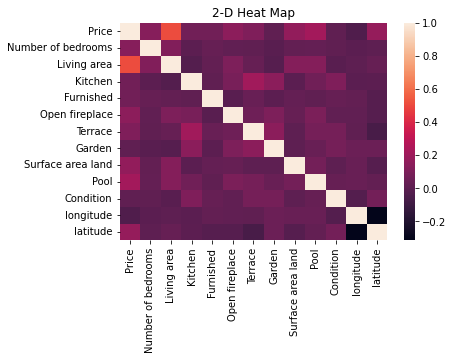

In [16]:
ax = sns.heatmap(df.corr())
  
plt.title( "2-D Heat Map" )
plt.show()

<BarContainer object of 14 artists>

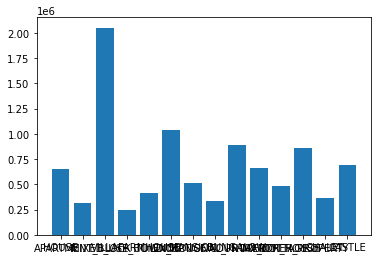

In [6]:
plt.bar(df["Property subtype"].drop_duplicates(), df.groupby("Property subtype").mean().Price)

In [7]:
df.groupby("Property subtype").mean().Price

Property subtype
APARTMENT_BLOCK         6.527246e+05
BUNGALOW                3.141900e+05
CASTLE                  2.050000e+06
CHALET                  2.445000e+05
COUNTRY_COTTAGE         4.106226e+05
EXCEPTIONAL_PROPERTY    1.039724e+06
FARMHOUSE               5.097933e+05
HOUSE                   3.371955e+05
MANOR_HOUSE             8.921667e+05
MANSION                 6.625279e+05
MIXED_USE_BUILDING      4.878384e+05
OTHER_PROPERTY          8.607353e+05
TOWN_HOUSE              3.626649e+05
VILLA                   6.968433e+05
Name: Price, dtype: float64

In [8]:
df["Property subtype"].drop_duplicates()

0                      HOUSE
26           APARTMENT_BLOCK
34                     VILLA
45        MIXED_USE_BUILDING
144                FARMHOUSE
187               TOWN_HOUSE
192                  MANSION
200     EXCEPTIONAL_PROPERTY
233                 BUNGALOW
458          COUNTRY_COTTAGE
591              MANOR_HOUSE
2050          OTHER_PROPERTY
2392                  CHALET
3075                  CASTLE
Name: Property subtype, dtype: object

In [17]:
X = train_df.drop(["Price"], axis=1)
y = train_df.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
clf = RandomForestRegressor().fit(X_train, y_train)
clf.score(X_train, y_train)

0.9394337015106249

In [19]:
clf.score(X_test, y_test)

0.6040237165973208

In [22]:
train_df.columns

Index(['Price', 'Number of bedrooms', 'Living area', 'Kitchen', 'Furnished',
       'Open fireplace', 'Terrace', 'Garden', 'Surface area land', 'Pool',
       'Condition', 'longitude', 'latitude',
       'Property subtype_APARTMENT_BLOCK', 'Property subtype_BUNGALOW',
       'Property subtype_CASTLE', 'Property subtype_CHALET',
       'Property subtype_COUNTRY_COTTAGE',
       'Property subtype_EXCEPTIONAL_PROPERTY', 'Property subtype_FARMHOUSE',
       'Property subtype_HOUSE', 'Property subtype_MANOR_HOUSE',
       'Property subtype_MANSION', 'Property subtype_MIXED_USE_BUILDING',
       'Property subtype_OTHER_PROPERTY', 'Property subtype_TOWN_HOUSE',
       'Property subtype_VILLA'],
      dtype='object')

In [12]:
#pickle.dump(clf, open("models/random_forest.sav", 'wb'))